## Question:

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. 

Hint: the **KNeighborsClassifier** works quite well for this task; you just need to find a good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

## Solution:

### Fetch the dataset 

In [5]:
from sklearn.datasets import fetch_openml
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
# FETCH MNIST dataset with fetch_openml
mnist= fetch_openml("mnist_784", version =1, parser ="auto")

In [7]:
#check dataset
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
#Extracting data and target labels
X,y=mnist["data"],mnist["target"]

In [11]:
#Check if data has empty values
X.isnull().sum().any()

False

In [12]:
y.isnull().sum().any()

False

Since our data looks okay , with no missing values .Let's dive deeper

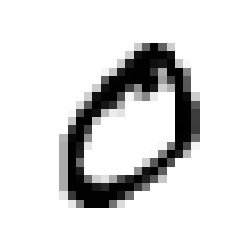

In [20]:
fig,ax= plt.subplots(figsize=(3,3))
ax.imshow(X.iloc[1].values.reshape(28,28),cmap="binary")
plt.axis("off")
plt.show()

This looks like a zero and indeed that's what the label says.

In [24]:
y[1] # Indeed it is a zero 

'0'

Let's change the dtype of the label , since most ML model take input as integers while this is represented  as a string.

In [28]:
y=y.astype(np.uint8)

## Train our Classifier

We have been hinted to use the KNeighborsClassifier as our model. But first let's split our dataset for training and testing.

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=(0.8),random_state=42)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [39]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [41]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf,X_train, y_train,cv=3,scoring="accuracy")

array([0.9666256 , 0.9689827 , 0.96657023])

Already with above 96% accuracy , that looks good.But our target is 97%  accuracy.

## Fine-tune our model

#### Grid Search

Scikit-Learn's GridSearchCV allows us to find a great combination of hyperparameter values which would otherwise be very tedious fiddling the hyperparameters manually.

All we need to do is tell it which hyperparameters we want it to experiment with and what values to try out,and it will use cross-validation to evaluate all the possible combinations of hyperparameters values.

In [48]:
knn_clf.get_params() # KNeighbors Classifier hyperparameters

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [4,6],'weights':['uniform','distance']}

In [55]:
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=3,scoring='accuracy',return_train_score=True)

In [56]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 6],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy')

You can get the best parameters by this:

In [59]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [60]:
cross_val_score(grid_search,X_train, y_train,cv=3,scoring="accuracy")

array([0.97037553, 0.97198264, 0.96940962])

Our classifier has greatly improved its accuracy to above 96.9% . Almost there!

**Let's scale our data to improve its prediction**

We'll scale our training set that is X_train and evaluate it's accuracy if it has improved or not.

In [64]:
from sklearn.preprocessing import StandardScaler
# this method scales the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()

Fit the scaler on the training data and transform it

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

Let's fit our classifier, with best parameters on the scaled X_train

In [68]:
knn_withscaled =KNeighborsClassifier(n_neighbors = 4 , weights ="distance")
knn_withscaled.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [69]:
#Evaluatinng our classifier
cross_val_score(knn_withscaled,X_train,y_train,cv=3,scoring="accuracy")

array([0.97037553, 0.97198264, 0.96940962])

Yeah! The model has maintained it's accuracy.

Let's test it on the test set

In [72]:
y_pred = knn_withscaled.predict(X_test)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [75]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(y_test,y_pred)

Let's us plot it to view 

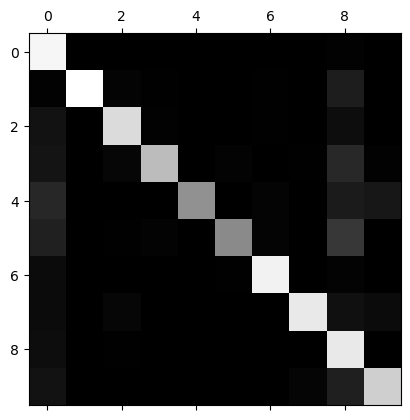

In [76]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

The diagonal looks good ,since most images are on the main diagonal meaning that they were correctly classified.

Nevertheless, we can see some brighter spots on the 9th column and the first column. 

This shows that our column wrongly groups most image digits as 8 and 1 which aren't.

In [81]:
cross_val_score(knn_withscaled,X_test,y_test,cv=3,scoring="accuracy")

array([0.95200343, 0.95050354, 0.95263609])

## Conclusion

Our classifier , after vigorous effort of fine tuning it with grid search and also scaling our input data, reached an accuracy of above 96.9% on the training set.

However , with our test set, the accuracy reduced to 95% which is acceptable as it shows that our model's capacity to make good predictions is okay.

There were some areas in the dataset needed to be  improved as the classifier was quite confused while classifying them , known areas were classifying digits as 8 and 0.